In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [4]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i - 60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [11]:
regressor = Sequential()
regressor.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=100, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=100, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=100))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
regressor.fit(X_train, y_train, epochs=200, batch_size=64)

Epoch 1/200
19/19 [==============================] - 3s 12ms/step - loss: 0.0575
Epoch 2/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0113
Epoch 3/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0054
Epoch 4/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0050
Epoch 5/200
19/19 [==============================] - 0s 13ms/step - loss: 0.0045
Epoch 6/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0043
Epoch 7/200
19/19 [==============================] - 0s 13ms/step - loss: 0.0041
Epoch 8/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0043
Epoch 9/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0038
Epoch 10/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0035
Epoch 11/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0039
Epoch 12/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0043
Epoch 13/200
19/19 [=====

19/19 [==============================] - 0s 12ms/step - loss: 0.0021
Epoch 102/200
19/19 [==============================] - 0s 13ms/step - loss: 0.0017
Epoch 103/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0016
Epoch 104/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0014
Epoch 105/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0017
Epoch 106/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0017
Epoch 107/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0015
Epoch 108/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0016
Epoch 109/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0017
Epoch 110/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0015
Epoch 111/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0015
Epoch 112/200
19/19 [==============================] - 0s 12ms/step - loss: 0.0015
Epoch 113/200
19/1

19/19 [==============================] - 0s 13ms/step - loss: 0.0011
Epoch 200/200
19/19 [==============================] - 0s 12ms/step - loss: 9.3525e-04


In [13]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i - 60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

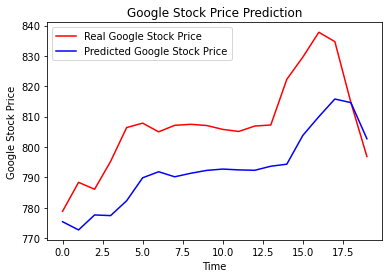

In [14]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()